# Problem set 3: Loading and structuring data from Denmark Statistics

In [115]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22320\3902924081.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Tasks

## Create a pandas DataFrame

Modify the code below such that *income* and *consumption* are variables in the *dt* DataFrame.

In [116]:
np.random.seed(1999)
 
N = 100
mydata = {}
mydata['id'] = range(N)
income = np.exp(np.random.normal(size=N))
consumption = np.sqrt(income)

mydata['income'] = income
mydata['consumption'] = consumption

dt = pd.DataFrame(mydata)
dt.head()

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712


**Answer:** see A01.py

## Create new variable

1) Add a new variable *ratio* which is the ratio of consumption to income.

In [117]:
# write your code here

dt['ratio'] = consumption/income

dt.head()

,id,income,consumption,ratio
0,0,0.727981,0.853218,1.172033
1,1,1.997831,1.413447,0.707490
2,2,0.276823,0.526140,1.900636
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513


**Answer:** See A02.py

## Summary statistics

Produce summary statistics using `.describe()`.

In [118]:
# write your code here
dt.describe()

,id,income,consumption,ratio
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,1.415547,1.087844,1.117517
std,29.011492,1.322203,0.484238,0.525452
min,0.000000,0.108402,0.329245,0.351134
25%,24.750000,0.529323,0.727545,0.752310
50%,49.500000,0.981178,0.990533,1.009580
75%,74.250000,1.768211,1.329572,1.374491
max,99.000000,8.110612,2.847914,3.037255


**Answer:** See A03.py

## Indexing

Select everybody with an income above 1.

In [119]:
# write your code here
dt.loc[dt['income'] > 1, :].head()

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
6,6,2.574032,1.604379,0.623294
7,7,2.475478,1.573365,0.635580


**Answer:** See A04.py

Select everybody with an income *above* 1 and a ratio *above* 0.7.

In [120]:
# write your code here
dt.loc[(dt.income > 1) & (dt.ratio > 0.7), :].head()

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
11,11,2.031708,1.425380,0.701567
18,18,1.280235,1.131475,0.883802


**Answer:** See A05.py

Set consumption equal to 0.5 if income is less than 0.5.

In [121]:
# write your code here
# dt['consumption'].mean() # <- compare with answer

# a. choose rows where income < 0.5
X  = (dt.income < 0.5)
# b. change entries
dt.loc[X, ['consumption']] = 0.5

dt['consumption'].mean() 


1.075479712048503

**Answer:**  See A06.py

Set consumption equal to income if income is less than 0.5.

In [122]:
# write your code here
# dt['consumption'].mean() # <- compare with answer

# a. choose rows where income < 0.5
X  = (dt.income < 0.5)
# b. change entries
dt.loc[X, ['consumption']] = dt.loc[X, ['income']].values 

dt['consumption'].mean() 


1.0337728690050054

**Answer:** See A07.py

## Dropping

Drop the *ratio* variable and all rows with an income above 1.5. After this, also drop the first 5 rows.

In [123]:
print(f'before: {dt.shape[0]} observations, {dt.shape[1]} variables')
# write your code here
dt.drop('ratio', axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made

# select and drop rows
Y = (dt.income > 1.5)
dt = dt.loc[Y == False]

# drop first five rows
I = dt.iloc[0:6,:]
dt.drop(dt.loc[:5].index,inplace=True)

#reset index !

dt.head(5)

print(f'after: {dt.shape[0]} observations, {dt.shape[1]} variables')

before: 100 observations, 4 variables
after: 65 observations, 3 variables


**Answer:** see A08.py

## Renaming

Rename *consumption* to *cons* and *income* to *inc*.

In [124]:
# write your code
dt.rename(columns = {'income':'inc', 'consumption':'cons'}, inplace=True)
dt.head()

,id,inc,cons
8,8,0.582074,0.762938
10,10,0.932044,0.965424
12,12,0.356952,0.356952
13,13,0.379825,0.379825
16,16,0.700896,0.837195


**Answer:** see A09.py

## Functions

Correct the wrong lines such that `assets_1 = assets_2 = assets_3 = assets_4`.

In [125]:
def assets_row_by_row(x,R,Y):
    return R*(x['inc']-x['cons'])+Y # wrong line
    
def assets_all_at_once(inc,cons,R,Y):
    return R*(inc-cons)+Y # wrong line

def assets_adj(assets,R,Y):
     assets *=R
     assets +=Y

R = 1.2 # return rate
Y = 1 # income


try:
    dt['assets_1'] = R*(dt['inc']-dt['cons'])+Y
    dt['assets_2'] = dt.apply(assets_row_by_row,axis=1,args=(R,Y))
    dt['assets_3'] = assets_all_at_once(dt['inc'].values(),dt['cons'].values(),R,Y)
    dt['assets_4'] = dt['inc']-dt['cons']
    assets_adj(dt['assets_4'],R,Y)
except:
    print('failed')
dt.head()    

failed


,id,inc,cons,assets_1,assets_2
8,8,0.582074,0.762938,0.782963,0.782963
10,10,0.932044,0.965424,0.959943,0.959943
12,12,0.356952,0.356952,1.000000,1.000000
13,13,0.379825,0.379825,1.000000,1.000000
16,16,0.700896,0.837195,0.836441,0.836441


**Answer:** see A10.py

# Problem

Load the data set in *data/NAH1_pivoted.xlsx* and clean and structure it such that the `plot_timeseries(dataframe)` below can be run and produce an interactive figure. 

In [126]:
def _plot_timeseries(dataframe, variable, years):
    
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    
    dataframe.loc[:,['year']] = pd.to_numeric(dataframe['year'])
    I = (dataframe['year'] >= years[0]) & (dataframe['year'] <= years[1])
    
    x = dataframe.loc[I,'year']
    y = dataframe.loc[I,variable]
    ax.plot(x,y)
    
    ax.set_xticks(list(range(years[0], years[1] + 1, 5)))    
    
def plot_timeseries(dataframe):
    
    widgets.interact(_plot_timeseries, 
    dataframe = widgets.fixed(dataframe),
    variable = widgets.Dropdown(
        description='variable', 
        options=['Y','C','G','I','X','M'], 
        value='Y'),
    years=widgets.IntRangeSlider(
        description="years",
        min=1966,
        max=2018,
        value=[1980, 2018],
        continuous_update=False,
    )                 
); 

**Hint 1:** You can base your renaming on this dictionary:

In [127]:
rename_dict = {}
rename_dict['P.1 Produktion'] = 'Y'
rename_dict['P.3 Offentlige forbrugsudgifter'] = 'G'
rename_dict['P.3 Samlede udgifter til forbrug'] = 'C'
rename_dict['P.5 Bruttoinvesteringer'] = 'I'
rename_dict['P.6 Eksport af varer og tjenester'] = 'X'
rename_dict['P.7 Import af varer og tjenester'] = 'M'

**Hint 2:** You code should have the following structure:

In [135]:
# a. load data set 
file_path = 'C:/Users/Lenovo/Downloads/2024321135640455513751NAH1.xlsx'

nah1 = pd.read_excel(file_path)

# a. load data set
nah1 = pd.read_excel(file_path,skiprows=2)
nah1.head()

# b. rename variables
rename_dict['Unnamed: 0'] = 'year'
nah1.rename(columns=rename_dict,inplace=True)


# c. remove rows where Y is nan
#I = nah1[''].notna()
#nah1 = nah1[I]

# d. correct year column data
#I = nah1['year'].notna()
#J = nah1['year'].isna()
#nah1.loc[J,['year']] = nah1.loc[I,['year']].values

# e. only keep rows with '2010-prices, chained values'
##I = nah1['Unnamed: 1'] == '2010-prices, chained values'
#nah1 = nah1[I]

# f. only keep renamed variables
#nah1 = nah1.loc[:,['year','Y','C','G','I','X','M']]
#nah1
# e. only keep rows with '2010-prices, chained values'

# f. only keep renamed variables

# g. interactive plot

# plot_timeseries(nan)
#nah1 = pd.read_excel()

# b. rename variables

# c. remove rows where Y is nan

# d. correct year column data
# hint, nah1.loc[J,['year']] = nah1.loc[I,['year']].values

# e. only keep rows with '2010-prices, chained values'

# f. only keep renamed variables

# g. interactive plot
# plot_timeseries(nan)

TypeError: DataFrame.rename() got an unexpected keyword argument 'rows'

**Answer:** see A11.py

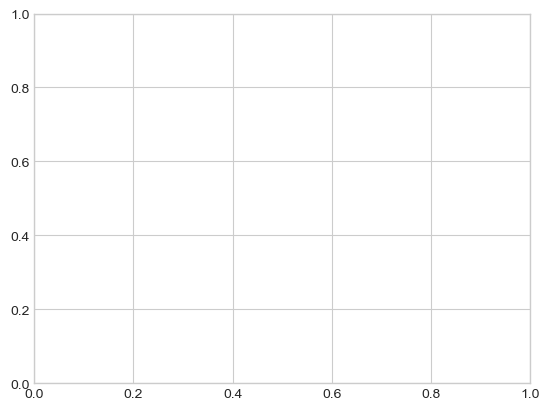

interactive(children=(Dropdown(description='variable', options=('Y', 'C', 'G', 'I', 'X', 'M'), value='Y'), Int…

In [ ]:
plot_timeseries(nah1)

# Extra problems

## Extend interactive plot

Extend the interactive plot with a choice of *real* vs *nominal*.

## New data set

Load data from an Excel or CSV file you have downloaded from e.g. [Statistikbanken.dk](https://www.statistikbanken.dk/). Clean, structure and present the data as you see fit.